__Data Scientist:__ Gail Wittich <br>__Email:__ gwittich@optusnet.com.au <br>__Website:__ www.linkedin.com/in/gail-wittich-7709b4a <br> __Copyright__ : 'Copyright 2020, Gail Wittich'

## Salary Prediction Project - EDA
The goal of this script is to build baseline predictive model for the Salary Prediction dataset. 

Before doing that it loads, examines, cleans, and validates the data. Then  data shows the distribution and correlation of each individual feature against the target feature, salary.
Categoriacl features are then label encoded with the average salary for each category in each feature. The relationship between each features and the salary is shown on correlation matrix. 
A baseline model is created and a hypothisis defined. 
Cleaned data is saved for future use.

In [1]:
#!/usr/bin/env python3

import gc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

### Load the data

In [2]:
# Read files and load dataframes
train_feature_df = pd.read_csv('data/train_features.csv')
train_target_df = pd.read_csv('data/train_salaries.csv')
test_feature_df = pd.read_csv('data/test_features.csv')

## Examine the data

### Inspect length and dtypes of each dataframe

In [3]:
#train_feature_df.info()   df.head and df.shape give a nicer layout
display(train_feature_df.head())
print(train_feature_df.shape)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16


(1000000, 8)


In [4]:
display(test_feature_df.head())
print(test_feature_df.shape)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362685407687,COMP33,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73
1,JOB1362685407688,COMP13,JUNIOR,NONE,NONE,AUTO,20,47
2,JOB1362685407689,COMP10,CTO,MASTERS,BIOLOGY,HEALTH,17,9
3,JOB1362685407690,COMP21,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96
4,JOB1362685407691,COMP36,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44


(1000000, 8)


In [5]:
display(train_target_df.head())
print(train_target_df.shape)

,jobId,salary
0,JOB1362684407687,130
1,JOB1362684407688,101
2,JOB1362684407689,137
3,JOB1362684407690,142
4,JOB1362684407691,163


(1000000, 2)


The number of data points in 'train_feature_df' and 'train_target_df' are the same. <br/>Both 'train_feature_df' and 'train_target_df' have 'jobId' so this will be used as the key when merging data.<br/>The format of 'test_feature_df' and train_feature_df' are identical. Therfore no manipulation of columns is required.<br/>

In [6]:
key = 'jobId'

### Merge features and targets into single df (delete source to save memory)

In [7]:
train_df = pd.merge(train_feature_df, train_target_df, on=key)

In [8]:
display(train_df.head())
print(train_df.shape)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


(1000000, 9)


In [9]:
del train_feature_df
del train_target_df
gc.collect()

20

In [10]:
# train_df.info()
display(train_df.head())
print(train_df.shape)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


(1000000, 9)


## Clean the data up

### Check for duplicates

In [11]:
train_df.duplicated().sum()

0

In [12]:
test_feature_df.duplicated().sum()

0

There are no duplicates so no action required.

### Check for missing data

In [13]:
print("Features and number of missing values: ")
for col in train_df.columns:
    print(col, train_df[col].isnull().sum())

Features and number of missing values: 
jobId 0
companyId 0
jobType 0
degree 0
major 0
industry 0
yearsExperience 0
milesFromMetropolis 0
salary 0


There are no missing values so no action required.

### Check validity of specific feature's data

In [14]:
# yearsExperience should not be less than 0
invalid_yearsExperience = train_df[train_df['yearsExperience'] < 0].copy()
print("The following jobIds have invalid data for yearsExperience: ")
display(invalid_yearsExperience)

The following jobIds have invalid data for yearsExperience: 


,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary


There are no invalid yearsExperience values so no action required.

In [15]:
# milesFromMetropolis should not be less than 0
invalid_milesFromMetropolis = train_df[train_df['milesFromMetropolis'] < 0].copy()
print("The following jobIds have invalid data for milesFromMetropolis: ")
display(invalid_milesFromMetropolis)

The following jobIds have invalid data for milesFromMetropolis: 


,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary


There are no invalid milesFromMetropolis values so no action required.

In [16]:
# salary should not be less than 1
invalid_salary = train_df[train_df['salary'] < 1].index
print("The following jobIds have invalid data for 'salary': ")
display(invalid_salary)

# **** this is a quick and risky way to delete - it is safe only because I have
# done it all in one cell. Seperating it to two logioal cells runs the risk of 
# the second cell being run multiple times and deleting rows repeatedly based 
# new on indexes reducing the length of the df by 5 each time! ****

The following jobIds have invalid data for 'salary': 


Int64Index([30559, 495984, 652076, 816129, 828156], dtype='int64')

### Remove records with invalid data

In [17]:
# Delete rows with invalid salary from train_target_df
print("Deleting invalid entries from train_df.")
print()
train_df.drop(invalid_salary, inplace=True)

# Ensures that re-running this cell does not delete the new entries at 
# the old indexes with invalid salaries.
invalid_salary = 'NaN'

# reset index, because we dropped rows
train_df.reset_index(drop=True, inplace=True)
print("'train_df' shape after deletion and index reset:")
display(train_df.head())
print(train_df.shape)

Deleting invalid entries from train_df.

'train_df' shape after deletion and index reset:


,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


(999995, 9)


### Identify numeric and categorical variables

In [18]:
train_df.dtypes

jobId                  object
companyId              object
jobType                object
degree                 object
major                  object
industry               object
yearsExperience         int64
milesFromMetropolis     int64
salary                  int64
dtype: object

### Summarize numeric and categorical variables separately

In [19]:
numeric_cols = train_df.select_dtypes(include=np.number).columns.tolist()
numeric_cols

['yearsExperience', 'milesFromMetropolis', 'salary']

#### Remove target variable (salary)

In [20]:
numeric_cols.remove('salary')
numeric_cols

['yearsExperience', 'milesFromMetropolis']

In [21]:
categorical_cols = train_df.select_dtypes(include=object).columns.tolist()
categorical_cols

['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry']

#### Remove less helpful variable, jobId, i.e. the key.
The key is discarded because it is unique to individual entries

In [22]:
categorical_cols.remove('jobId')
categorical_cols

['companyId', 'jobType', 'degree', 'major', 'industry']

### Explore Features

In [23]:
for col in categorical_cols: 
    print("  ", col)
    print(train_df[col].value_counts())
    print()

   companyId
COMP39    16193
COMP35    16114
COMP59    16066
COMP30    16041
COMP3     16028
          ...  
COMP17    15715
COMP0     15666
COMP2     15641
COMP8     15638
COMP57    15635
Name: companyId, Length: 63, dtype: int64

   jobType
SENIOR            125886
VICE_PRESIDENT    125234
MANAGER           125120
CTO               125045
JANITOR           124971
CEO               124778
JUNIOR            124592
CFO               124369
Name: jobType, dtype: int64

   degree
HIGH_SCHOOL    236975
NONE           236853
BACHELORS      175495
DOCTORAL       175362
MASTERS        175310
Name: degree, dtype: int64

   major
NONE           532353
CHEMISTRY       58875
LITERATURE      58684
ENGINEERING     58594
BUSINESS        58518
PHYSICS         58410
COMPSCI         58382
BIOLOGY         58379
MATH            57800
Name: major, dtype: int64

   industry
WEB          143205
AUTO         142941
FINANCE      142866
EDUCATION    142819
OIL          142770
HEALTH       142755
SERVICE      1

In [24]:
print("  ", 'salary')
print(train_df.salary.value_counts())
print()

   salary
108    10467
114    10407
107    10371
112    10361
104    10297
       ...  
293        2
294        2
298        1
290        1
17         1
Name: salary, Length: 279, dtype: int64



In [25]:
for col in numeric_cols:
    print("  ", col)
    print(train_df[col].value_counts())
    print()

   yearsExperience
15    40312
1     40264
9     40235
3     40190
22    40187
8     40118
6     40094
18    40088
17    40072
7     40047
2     40045
4     40036
10    40032
23    40015
5     40013
20    39988
11    39948
16    39873
19    39860
24    39860
0     39839
14    39827
13    39826
21    39759
12    39467
Name: yearsExperience, dtype: int64

   milesFromMetropolis
99    10180
62    10175
63    10159
97    10155
41    10147
      ...  
26     9845
6      9839
18     9824
87     9815
20     9807
Name: milesFromMetropolis, Length: 100, dtype: int64



### Visualize target variable (salary)

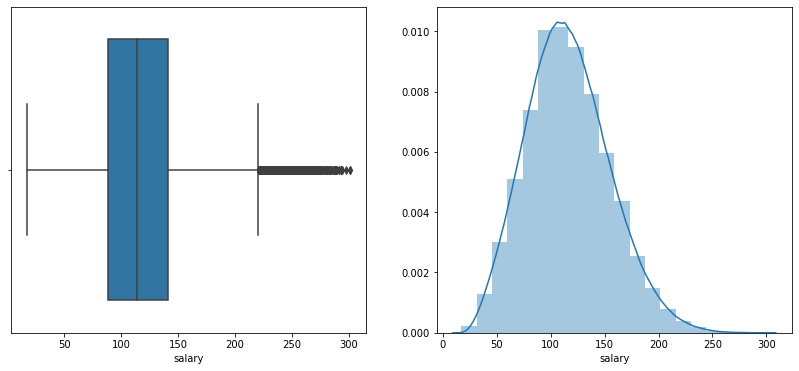

In [26]:
plt.figure(figsize = (14, 6))
plt.subplot(1,2,1)
sns.boxplot(train_df.salary)
plt.subplot(1,2,2)
sns.distplot(train_df.salary, bins=20)
plt.show()

### Use IQR rule to identify potential outliers

In [27]:
stat = train_df.salary.describe()
print(stat)
IQR = stat['75%'] - stat['25%']
upper = stat['75%'] + 1.5 * IQR
lower = stat['25%'] - 1.5 * IQR
print()
print('The suspected outliers Upper Bound is {} and the Lower Bound is {}.'
      .format(upper, lower))

count    999995.000000
mean        116.062398
std          38.717163
min          17.000000
25%          88.000000
50%         114.000000
75%         141.000000
max         301.000000
Name: salary, dtype: float64

The suspected outliers Upper Bound is 220.5 and the Lower Bound is 8.5.


### Examine potential outliers

In [28]:
#check potential outlier below lower bound
train_df[train_df.salary < 8.5]

train_df.loc[train_df.salary > 222.5, 'jobType'].value_counts()

CEO               2893
CFO               1308
CTO               1298
VICE_PRESIDENT     520
MANAGER            188
SENIOR              50
JUNIOR              16
Name: jobType, dtype: int64

In [29]:
#summarise potential outlier above upper bound
print("Feature           Count")
train_df.loc[train_df.salary > 222.5, 'jobType'].value_counts()

Feature           Count


CEO               2893
CFO               1308
CTO               1298
VICE_PRESIDENT     520
MANAGER            188
SENIOR              50
JUNIOR              16
Name: jobType, dtype: int64

Management type roles would be amoung those you would expect to earn salaries above the upper bound. However, it seem unusual for a Junior role to have a salary above the upper bound.

In [30]:
# investigate most suspicious potential outliers above upper bound
train_df[(train_df.salary > 222.5) & (train_df.jobType == 'JUNIOR')]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
1222,JOB1362684408909,COMP40,JUNIOR,MASTERS,COMPSCI,OIL,24,5,225
27710,JOB1362684435397,COMP21,JUNIOR,DOCTORAL,ENGINEERING,OIL,24,3,246
31354,JOB1362684439042,COMP45,JUNIOR,DOCTORAL,COMPSCI,FINANCE,24,0,225
100041,JOB1362684507729,COMP17,JUNIOR,DOCTORAL,BUSINESS,FINANCE,23,8,248
160332,JOB1362684568020,COMP18,JUNIOR,DOCTORAL,BUSINESS,FINANCE,22,3,223
303777,JOB1362684711465,COMP51,JUNIOR,MASTERS,ENGINEERING,WEB,24,2,226
348353,JOB1362684756041,COMP56,JUNIOR,DOCTORAL,ENGINEERING,OIL,23,25,226
500737,JOB1362684908426,COMP40,JUNIOR,DOCTORAL,ENGINEERING,OIL,21,0,227
627532,JOB1362685035221,COMP5,JUNIOR,DOCTORAL,ENGINEERING,OIL,24,29,230
645553,JOB1362685053242,COMP36,JUNIOR,DOCTORAL,BUSINESS,FINANCE,24,1,225


Further investigation reveals that the junior roles with salaries above the upper bound are within industries that are well known for high salaries (oil, finance). It is likely that these entries are valid and they will remain in the training set.

### Define Plot module

In [31]:
# Generic Feature Plotting module
def plot_feature(df, col, target):
    # Make plot for each feature
    #     distribution of samples of the feature - on the left
    #     dependance of TARGET on the feature - on the right
    plt.figure(figsize = (14, 6))
    plt.subplot(1, 2, 1)

    if df[col].dtype == 'int64':
        df[col].value_counts().sort_index().plot()
    else:
        # change the categorical variable to category type and order their level by the mean salary
        # in each category
        mean = df.groupby(col)[target].mean()
        df[col] = df[col].astype('category')
        levels = mean.sort_values().index.tolist()
        df[col].cat.reorder_categories(levels, inplace=True)
        df[col].value_counts().plot()
    
    plt.xticks(rotation=45)
    plt.xlabel(col)
    plt.ylabel('Counts')
    plt.subplot(1, 2, 2)

    if df[col].dtype == 'int64' or col == 'companyId':
        # plot the mean for the target for each category and fill between the (mean - std, mean + std)
        mean = df.groupby(col)[target].mean()
        std = df.groupby(col)[target].std()
        mean.plot()
        plt.fill_between(range(len(std.index)), mean.values-std.values, mean.values + std.values, \
                         alpha = 0.1)
    else:
        sns.boxplot(x = col, y = target, data=df)
    
    plt.xticks(rotation=45)
    plt.ylabel(target)
    plt.show()
    return(target)

## Examine the distribution and then the correlation of each feature with salary.

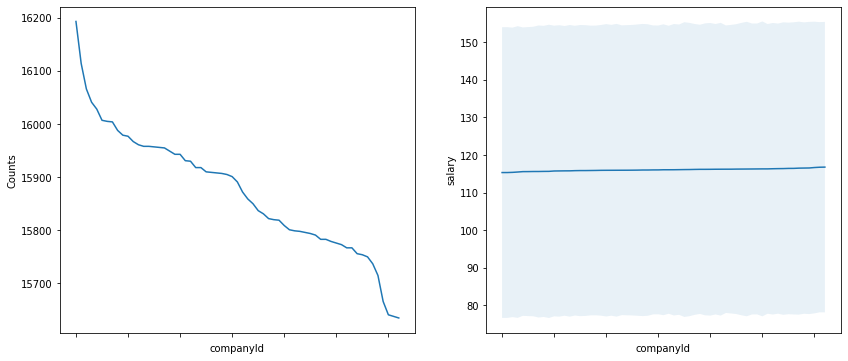

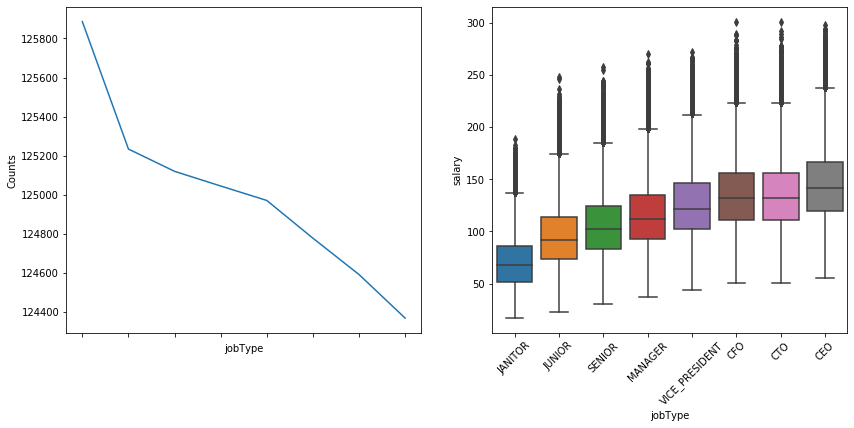

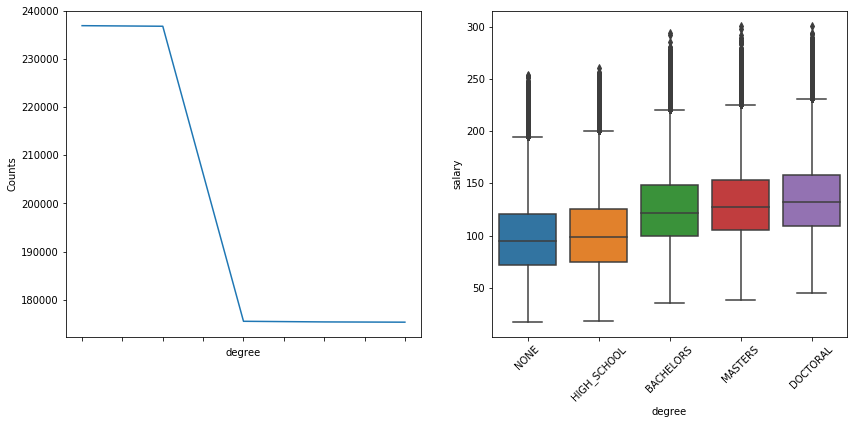

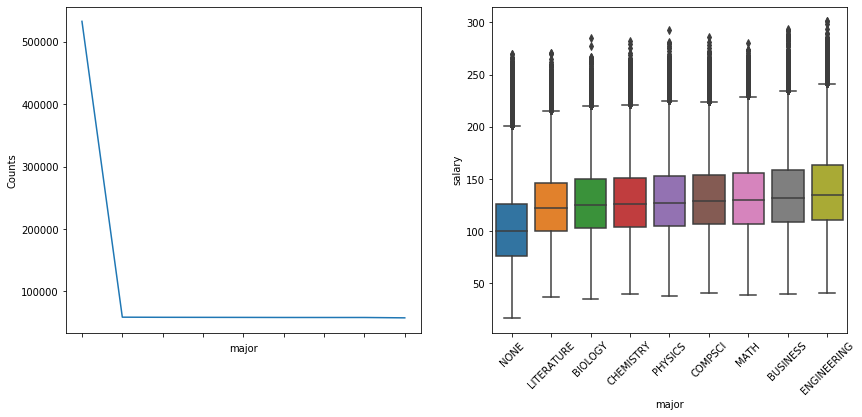

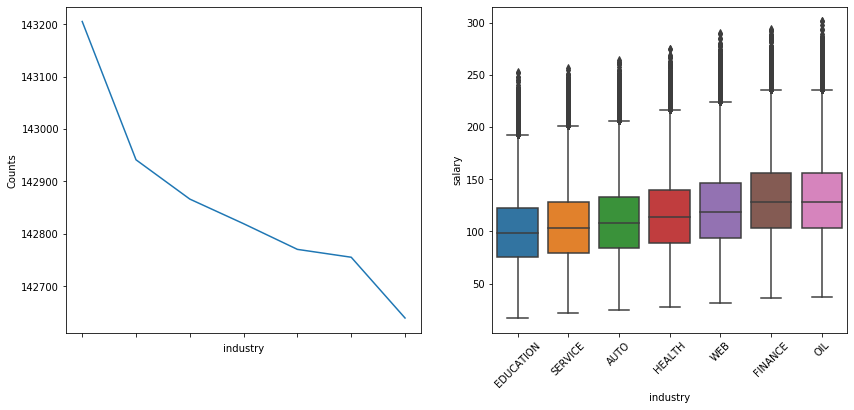

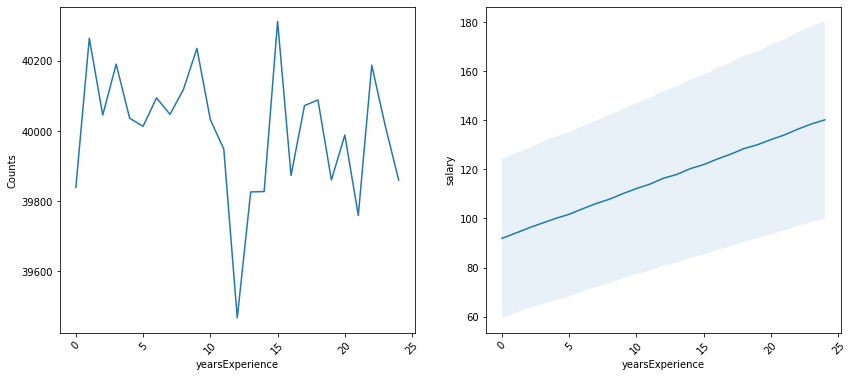

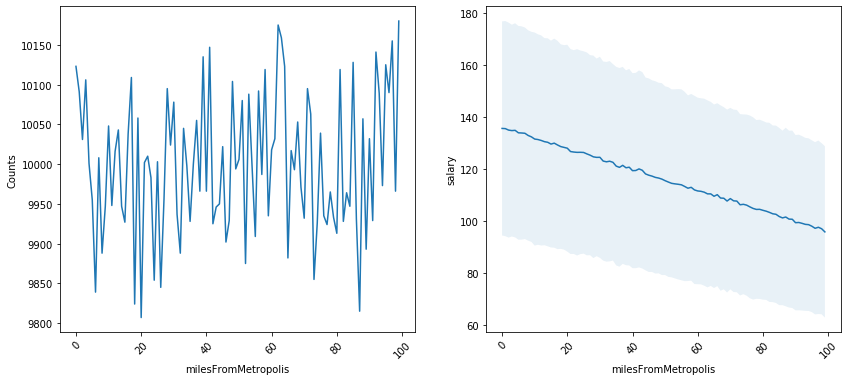

In [32]:
target = 'salary'
for col in categorical_cols:
    plot_feature(train_df, col, target)

for col in numeric_cols:
    plot_feature(train_df, col, target)

COMPANY - Salary is weakly associated with companies.<br/>JOB TYPE - There is a clear positive correlation between job type and salary.<br/>DEGREE - More advanced degrees tend to correspond to higher salaries.<br/>MAJOR - People with majors of engineering, business and math generally have higher salaries.<br/>INDUSTRY - Oil, finance and web industries generally pay better.<br/>YEARS OF EXPERIENCE - In general, there is a clear correlation between salary and years of experience.<br/>DISTANCE TO METRO - In general, salaries decrease with greater distance from the metropolis.

### Encode categories using average salary for each category to replace label

In [33]:
def encode_label(df, col):
    #encode the categories using average salary for each category to replace label
    categories_dict = {}
    cats = df[col].cat.categories.tolist()
    for cat in cats:
        categories_dict[cat] = train_df[train_df[col] == cat]['salary'].mean()   
    df[col] = df[col].map(categories_dict)

In [34]:
df = train_df.copy()
for col in df.columns:
    if df[col].dtype.name == "category":
        encode_label(df, col)
df.dtypes       

jobId                    object
companyId              category
jobType                category
degree                 category
major                  category
industry               category
yearsExperience           int64
milesFromMetropolis       int64
salary                    int64
dtype: object

In [35]:
for col in categorical_cols:
    df[col] = df[col].astype('int64')

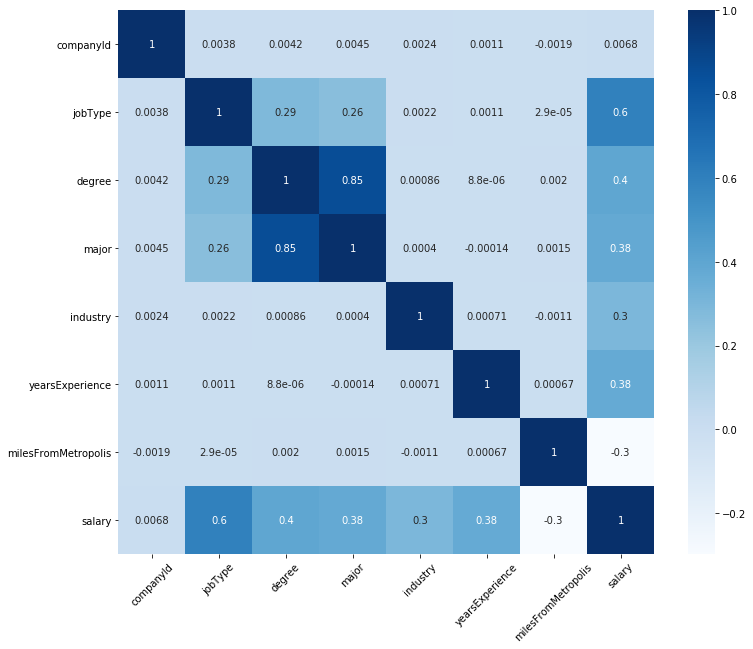

In [36]:
# Correlations between features (excluding jobId) and response (salary)
fig = plt.figure(figsize=(12, 10))
sns.heatmap(df[categorical_cols + numeric_cols + ['salary']].corr(), cmap='Blues', annot=True)
plt.xticks(rotation=45)
plt.show()

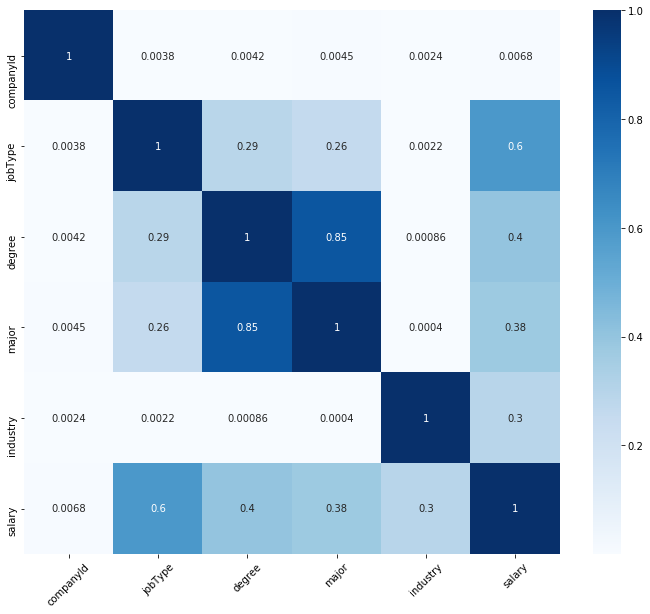

In [37]:
fig = plt.figure(figsize=(12, 10))
sns.heatmap(df[categorical_cols + ['salary']].corr(), cmap='Blues', annot=True)
plt.xticks(rotation=45)
plt.show()

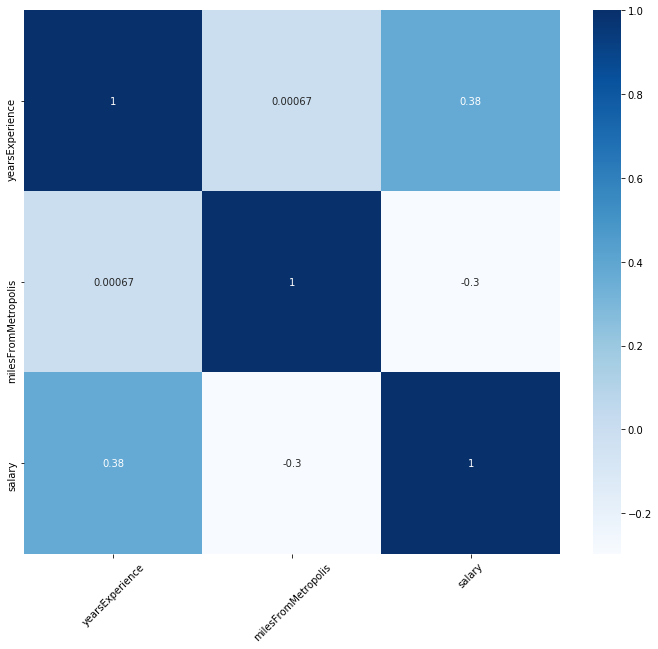

In [38]:
fig = plt.figure(figsize=(12, 10))
sns.heatmap(df[numeric_cols + ['salary']].corr(), cmap='Blues', annot=True)
plt.xticks(rotation=45)
plt.show()

We see that jobType is most strongly correlated with salary, followed by degree, major, and yearsExperience.

Among the features, we see that degree and major have a strong degree of correlation and jobType has a moderate degree of correlation with both degree and major.

## 2.6 Establish a baseline

In [39]:
#create an extremely simple model and measure its efficacy using MSE
#Run Baseline Model
regression = LinearRegression().fit(df[categorical_cols + numeric_cols], df['salary'])

#then measure MSE during 5-fold cross-validation
regression.score = cross_val_score(regression, df[categorical_cols + numeric_cols], df['salary'], scoring="neg_mean_squared_error")
regression_mse = -1.0 * regression.score.mean()

#### Display Baseline Results

In [40]:
print("LinearRegression - MSE:", regression_mse)

LinearRegression - MSE: 399.7641175068985


## 2.7 Hypothesize solution


### Models: 
The baseline model predicts the salary based on the data provided without fitting, feature generation or tunning.

Supervised Machine Learning algorithms will be used to improve the prediction results. Regression and Ensembles of Regression Algorithms suit our data and goal. 3 models that may improve results over the baseline model given the above EDA:
 - LinearRegression                - Sometimes simple is best
 - RandomForestRegressor           - Improved accuracy and control over-fittings
 - GradientBoostingRegressor       - Can optimise on Least Squares regression. 

### Feature Generation
The strength of the relationships between Salary and each of the following features: 
- jobType
- degree
- major
- industry\
indicates a need to account for categories within them in some way in future models.

New features that could be beneficial to future models based on EDA:
 - summary statistics for each group, for each of the above positively correlated features. 

## Write files

In [41]:
train_df.to_csv('data/salaryPredictEDA.csv')

with open('data/categorical_cols.csv', 'w') as f:
    for item in categorical_cols:
        f.write("%s\n" % item)

with open('data/numeric_cols.csv', 'w') as f:
    for item in numeric_cols:
        f.write("%s\n" % item)
        
with open('data/target.csv', 'w') as f:
        f.write("%s\n" % target)
    
with open('data/key.csv', 'w') as f:
        f.write("%s\n" % key)